In [13]:
import pymc as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import causalpy as cp


import arviz as az
import pandas as pd

import seaborn as sns
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
print(f"Running on PyMC v{pm.__version__}")



Running on PyMC v5.8.2


In [15]:
df = pd.read_csv("/Users/sofiepelvig/apartments/assets/data/bolig.csv.gzip", compression="gzip", parse_dates=["soldDate"])


In [16]:
#Sorting fam_salg away
alm_salg_df = df[df['saleType'] == 'Alm. Salg']

#Sorting apartments away that where sold for under 500.000 and above 9.000.000
alm_salg_df = alm_salg_df[(alm_salg_df['price'] > 5e5) & (alm_salg_df['price'] < 9e6)]

In [10]:
# Select only 'price' and 'size' columns
df = alm_salg_df[['price', 'size']]

# Remove rows with missing or zero values
df = df[(df['price'] != 0) & (df['size'] != 0)].dropna()

# Log transform the columns
#df['price'] = np.log10(df['price'])  # Base 10 logarithm
#df['size'] = np.log10(df['size'])    # Base 10 logarithm

# Split the data
X, y = df[['size']], df[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# Display the first few rows of the new DataFrame
df.head()



,price,size
0,5400000,98
1,4195000,80
2,3475000,61
4,3744000,107
6,3150000,71


/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api

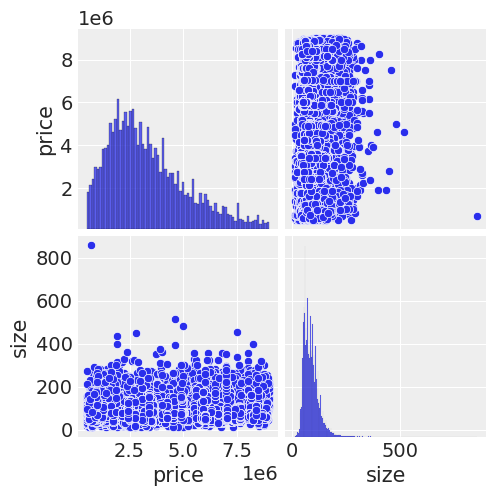

In [11]:
# pairplot
sns.pairplot(data = df)

In [14]:
model = pm.Model()

# Convert your data to numpy arrays
price = y_train['price'].to_numpy()
size = X_train['size'].to_numpy()

# Create a PyMC model

with model:
    price_ = pm.MutableData("price", price)
    size_ = pm.MutableData("size", size)

    alpha = pm.Normal("alpha", mu=-1.5, tau=1 / (0.06**2))
    beta0 = pm.Normal("beta0", mu=2, tau=1 / (0.06**2))
    beta1 = pm.Normal("beta1", mu=1, tau=1 / (0.04**2))
    sigma = pm.HalfNormal("sigma", tau=1 / (0.07**2))

    mu = alpha + beta0 * size_ + beta1 * price_
    pm.Normal("price_pred", mu=mu, tau=1 / (sigma**2), observed=price_, shape=mu.shape)

with model:
    idata = pm.sample(10)


/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: DropDims{axis=0}([56016])
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/Users/sofiepelvig/apartments/.pixi/env/lib/python3.10/site

KeyboardInterrupt: 